<a href="https://colab.research.google.com/github/Prakuljn/Python/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/ecommerce_data1.csv')
df.head()

,Unnamed: 0,Title,Price,RRP,Rating,Reviews,Purchases Past Month,Charges,Delivery Time,ASIN,Product Link
0,0,ACEMAGIC 15.6\n ...,£299.,£459.99,4.3,24.0,NaN,£12.25,"Tue, 6 May",B0DR2FWCDL,https://www.amazon.co.uk/sspa/click?ie=UTF8&sp...
1,1,"15.6"" Full HD Laptop - 8GB RAM 512GB SSD, Wind...",£279.,£349.99,4.7,215.0,300.0,£11.61,"Tue, 6 May",B0DT9XFCRB,https://www.amazon.co.uk/sspa/click?ie=UTF8&sp...
2,2,Acer Aspire Go 15 AG15-31P Laptop - Intel Core...,£298.,£354.00,4.4,86.0,100.0,NaN,NaN,NaN,https://www.amazon.co.uk/Acer-Aspire-AG15-31P-...
3,3,ACEMAGIC Laptop Computer 15.6 inch - Quad-Core...,£289.,£439.99,4.5,56.0,50.0,NaN,NaN,NaN,https://www.amazon.co.uk/sspa/click?ie=UTF8&sp...
4,4,ACEMAGIC 15.6 inch FHD Laptop Computer - Quad-...,£299.,£459.99,4.3,24.0,50.0,£12.25,"Tue, 6 May",B0DR2FWCDL,https://www.amazon.co.uk/sspa/click?ie=UTF8&sp...


In [3]:
columns_to_clean = ['Price', 'RRP', 'Charges']
df[columns_to_clean] = df[columns_to_clean].replace({'£': '', ',': ''}, regex=True)
df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')

In [4]:
df = df.drop(columns=['Unnamed: 0','Title','ASIN','Product Link','Delivery Time'])
df.head()

,Price,RRP,Rating,Reviews,Purchases Past Month,Charges
0,299.0,459.99,4.3,24.0,NaN,12.25
1,279.0,349.99,4.7,215.0,300.0,11.61
2,298.0,354.00,4.4,86.0,100.0,NaN
3,289.0,439.99,4.5,56.0,50.0,NaN
4,299.0,459.99,4.3,24.0,50.0,12.25


In [5]:
df['Charges'] = df['Charges'].fillna(0)
df['Purchases Past Month'] = df['Purchases Past Month'].fillna(0)

In [6]:
df.head()

,Price,RRP,Rating,Reviews,Purchases Past Month,Charges
0,299.0,459.99,4.3,24.0,0.0,12.25
1,279.0,349.99,4.7,215.0,300.0,11.61
2,298.0,354.00,4.4,86.0,100.0,0.00
3,289.0,439.99,4.5,56.0,50.0,0.00
4,299.0,459.99,4.3,24.0,50.0,12.25


In [7]:
df.isnull().sum()

,0
Price,33
RRP,182
Rating,29
Reviews,36
Purchases Past Month,0
Charges,0


In [8]:
from sklearn.impute import SimpleImputer

In [9]:
si = SimpleImputer()
df['Price'] = si.fit_transform(df[['Price']])
df['RRP'] = si.fit_transform(df[['RRP']])
df['Rating'] = si.fit_transform(df[['Rating']])
df['Reviews'] = si.fit_transform(df[['Reviews']])

In [10]:
df.isnull().sum()

,0
Price,0
RRP,0
Rating,0
Reviews,0
Purchases Past Month,0
Charges,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

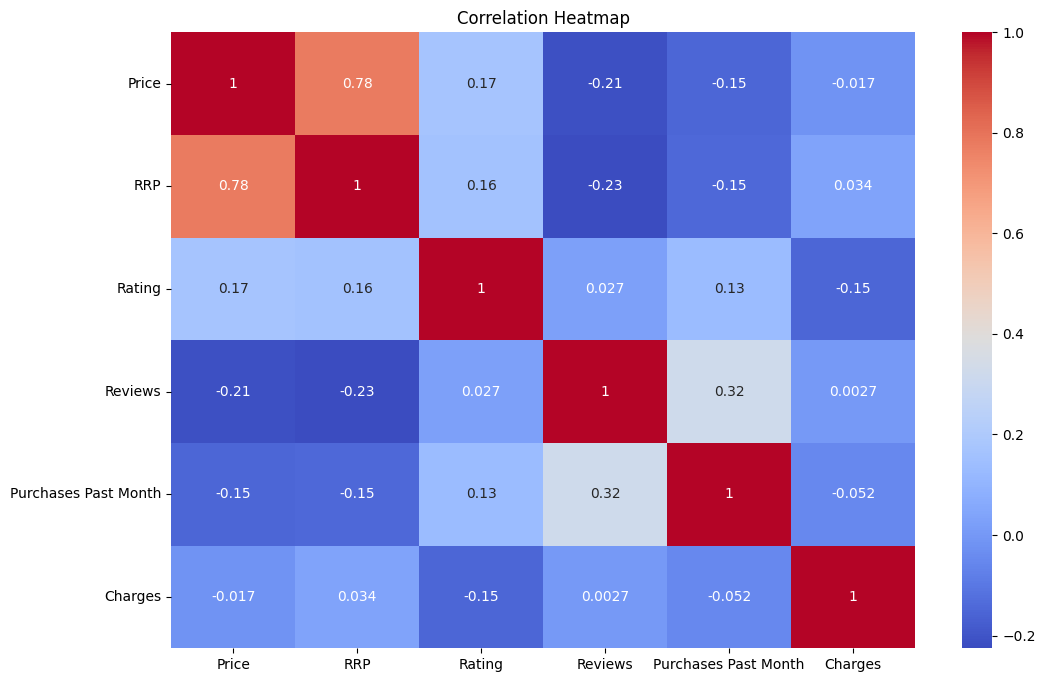

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

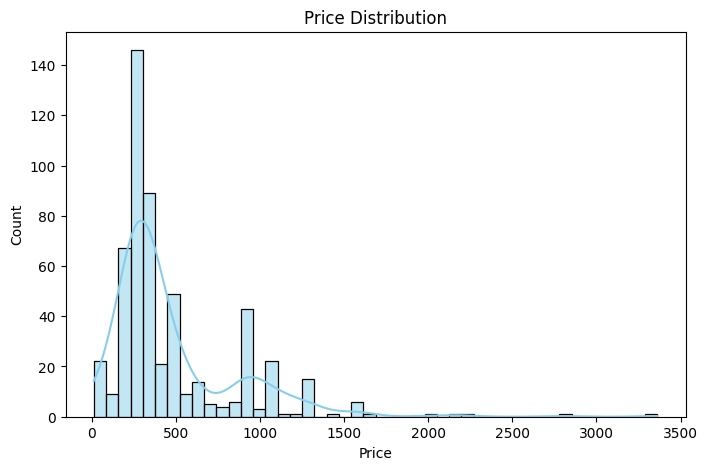

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [28]:
x = df.drop(columns = 'Price')
y = df['Price']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

model_performance = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    model_performance[name] = r2

print(model_performance)

{'Linear Regression': 0.9053479333285531, 'Decision Tree': 0.8024223073307188, 'Random Forest': 0.908174354403451}


In [32]:
best_model = max(model_performance, key=lambda x: model_performance[x])
print(f"The best model is: {best_model} with R^2 score of {model_performance[best_model]}")

The best model is: Random Forest with R^2 score of 0.908174354403451


In [33]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

In [34]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

In [35]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)


In [36]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [37]:
best_tuned_model = grid_search.best_estimator_

In [38]:
y_pred = best_tuned_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"Best Tuned Model R^2 Score: {r2}")

Best Tuned Model R^2 Score: 0.9360305404358253


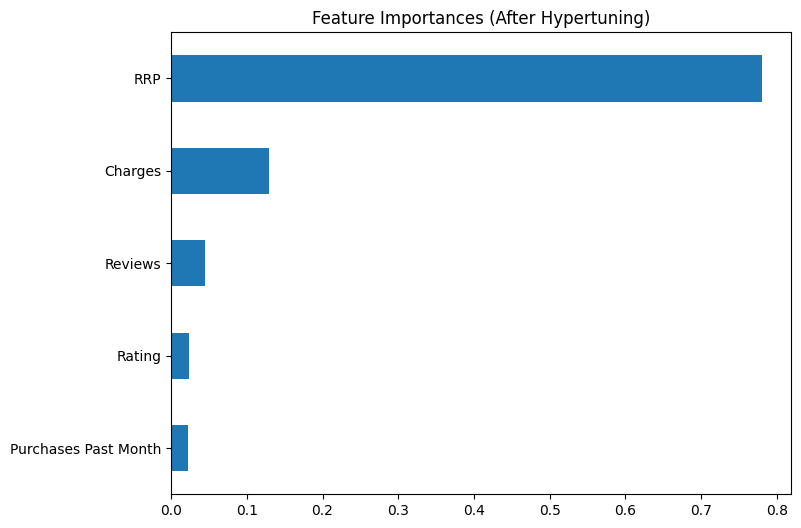

In [39]:
# 6. Plot Feature Importances again
feature_importances = pd.Series(best_tuned_model.feature_importances_, index=x.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances (After Hypertuning)')
plt.show()